In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams, patches
import seaborn as sns
import numpy as np
%matplotlib inline

def get_labels(age_classes):
    labels = []
    for l in age_classes:
        if l == '65-100':
            labels.append('65+')
        else:
            labels.append(l.replace('v',''))
    return labels

def season_to_label(season):
    if season == 2009.5:
        label = '2009Pan'
    else:
        label = str(int(season) - 1) + '-' + str(int(season))
    return label

def plot_residuals(age_classes,
                   all_seasons,
                   h3_seasons,
                   h1_best_file,
                   h3_best_file,
                   h1_colors,
                   h3_colors,
                   suptitle):
    labels = get_labels(age_classes)

    h1_df = pd.read_csv(h1_best_file, index_col=0)
    h3_df = pd.read_csv(h3_best_file, index_col=0)
    h1_df = h1_df.fillna(0)
    h3_df = h3_df.fillna(0)
    
    h1_df['Excess'] = h1_df.Observed - h1_df.Prediction
    h1_df['ci_low'] = h1_df.ci_low - h1_df.Prediction
    h1_df['ci_high'] = h1_df.ci_high - h1_df.Prediction

    h3_df['Excess'] = h3_df.Observed - h3_df.Prediction
    h3_df['ci_low'] = h3_df.ci_low - h3_df.Prediction
    h3_df['ci_high'] = h3_df.ci_high - h3_df.Prediction
    
    subplot = 1
    
    for season in all_seasons:
        if season in h3_seasons:
            seasondf = h3_df[h3_df.season == season]
            colors = h3_colors
        else:
            seasondf = h1_df[h1_df.season == season]
            colors = h1_colors

        plt.subplot(4,3,subplot)
        plt.gca().axhline(y=0, color='black', linewidth=1)
        
        plotdf = pd.DataFrame(index=age_classes)

        
        for index, row in seasondf.iterrows():
            ag = row.age_group
            excess = row.Excess

            if row.vac_status == 'unvaccinated':
                plotdf.loc[ag, 'Unvaccinated'] = excess
                plotdf.loc[ag, 'unvac_high'] = row.ci_high
                plotdf.loc[ag, 'unvac_low'] = row.ci_low
            else:
                plotdf.loc[ag, 'Vaccinated'] = excess
                plotdf.loc[ag, 'vac_high'] = row.ci_high
                plotdf.loc[ag, 'vac_low'] = row.ci_low
            
        plotdf.plot.bar(y = ['Unvaccinated', 'Vaccinated'],
                        ax=plt.gca(),
                        color=colors,
                        legend=False,
                        width = 0.6,
                        edgecolor='#333333')
        
        kwargs={'linewidth': 1,
                'zorder': 10,
                'color': '#8a8a8a'}
        plt.vlines(np.arange(-0.15,9, 1), ymin=plotdf.unvac_low, ymax=plotdf.unvac_high, **kwargs)
        plt.hlines(plotdf.unvac_low, xmin = np.arange(-0.3,9, 1), xmax=np.arange(0,9, 1), **kwargs)
        plt.hlines(plotdf.unvac_high, xmin = np.arange(-0.3,9, 1), xmax=np.arange(0,9, 1), **kwargs)
        plt.vlines(np.arange(0.15,9, 1), ymin=plotdf.vac_low, ymax=plotdf.vac_high, **kwargs)
        plt.hlines(plotdf.vac_low, xmin=np.arange(0,9, 1), xmax=np.arange(0.3,9, 1), **kwargs)
        plt.hlines(plotdf.vac_high, xmin=np.arange(0,9, 1), xmax=np.arange(0.3,9, 1), **kwargs)
        
        
        plt.gca().set_xlabel('')
        plt.title(season_to_label(season), fontweight='bold')


        if subplot in [10, 11, 12]:
            plt.xticks(range(0,9),labels, rotation=45, ha='right', size=7)
        else:
            plt.xticks(range(0,9), [])

        if subplot in [1, 4, 7, 10]:    
            plt.gca().set_ylabel('Excess\ncases', fontweight='bold')

        subplot += 1
        
    plt.gcf().set_size_inches(5.5,5)
    plt.tight_layout()
    
    b1, = plt.bar([10], [0], color=h1_colors[0], edgecolor='#333333', label='H1N1 unvaccinated')
    b2, = plt.bar([10], [0], color=h1_colors[1], edgecolor='#333333', label='H1N1 vaccinated')
    b3, = plt.bar([10], [0], color=h3_colors[0], edgecolor='#333333', label='H3N2 unvaccinated')
    b4, = plt.bar([10], [0], color=h3_colors[1], edgecolor='#333333', label='H3N2 vaccinated')
    
    plt.legend((b1, b2,b3,b4),
               ('H1N1 unvaccinated',
                'H1N1 vaccinated',
                'H3N2 unvaccinated',
                'H3N2 vaccinated'),
               loc='center',
               bbox_to_anchor=(-1, -0.9),
               ncol=2)
    plt.gcf().align_ylabels()
    plt.suptitle(suptitle)
    return (h1_df, h3_df)
    
def sum_residuals(age_classes,
                  exclude_seasons,
                  infile):
    labels = get_labels(age_classes)

    final_df = pd.read_csv(infile)

    final_df['Excess'] = final_df.Observed - final_df.Prediction
    final_df['ci_low'] = final_df.ci_low - final_df.Prediction
    final_df['ci_high'] = final_df.ci_high - final_df.Prediction

    
rcParams['font.sans-serif'] = 'arial'
rcParams['font.size'] = 10
rcParams['font.weight'] = 'medium'
pal = sns.xkcd_palette(['dark sky blue', 'sky', 'deep red', 'baby pink']).as_hex()

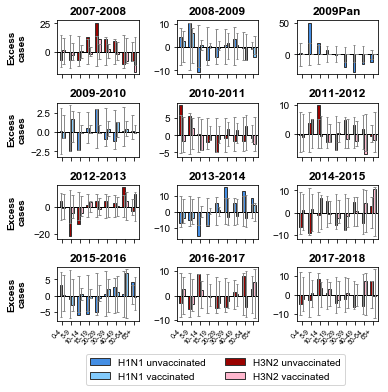

In [3]:
H3_expectations = '../final_results_for_ms/0-100/DAHVage_subtype_H3_expectations.csv'
H1_expectations = '../final_results_for_ms/0-100/DAHVage_subtype_H1_expectations.csv'

age_classes = ['0-4', '5-9', '10-14', '15-19', '20-29', '30-39', '40-49', '50-64', '65-100']
h3_seasons = [2008, 2011, 2012, 2013, 2015, 2017, 2018]
h1df, h3df = plot_residuals(age_classes,
               [2008, 2009, 2009.5, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
               h3_seasons,
               H1_expectations,
               H3_expectations,
               pal[0:2],
               pal[2:],
               '')
plt.savefig('../../Marshfield/Flu-A-imprinting-paper/excess_cases.svg', bbox_inches='tight')

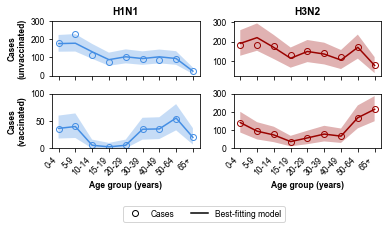

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
%matplotlib inline

df1 = pd.read_csv(H1_expectations)
df3 = pd.read_csv(H3_expectations)


rcParams['mathtext.default'] = 'regular'
rcParams['font.sans-serif'] = 'arial'
rcParams['font.size'] = 8.5
pal = sns.xkcd_palette(['dark sky blue', 'deep red']).as_hex()
age_groups = ['0-4',
              '5-9',
              '10-14',
              '15-19',
              '20-29',
              '30-39',
              '40-49',
              '50-64',
              '65-100']
labels = ['0-4',
              '5-9',
              '10-14',
              '15-19',
              '20-29',
              '30-39',
              '40-49',
              '50-64',
              '65+']
plt.subplot(2,2,1)



df1 = df1.groupby(['vac_status', 'age_group']).sum()
df3 = df3.groupby(['vac_status', 'age_group']).sum()

final_df = df1.loc[('unvaccinated', ),].copy()

final_df = final_df.loc[age_groups, ]


plt.plot(range(0, 9), final_df.Observed, 'o', color=pal[0], markerfacecolor='none')
final_df.plot(y='Prediction',
              style='-',
              ax=plt.gca(),
              legend=False,
              color=pal[0])

plt.gca().fill_between(x=range(0,9),
                       y1=np.array(final_df.ci_low),
                       y2 = np.array(final_df.ci_high),
                       alpha=0.3,
                       facecolor=pal[0])
plt.gca().set_xlabel('')
plt.gca().set_ylabel('Cases\n(unvaccinated)', weight='bold')
plt.title('H1N1', weight='bold')
plt.ylim(0, 300)
plt.xticks(range(0,9),[])

plt.subplot(2,2,2)
final_df = df3.loc[('unvaccinated', ),].copy()

final_df = final_df.loc[age_groups, ]
plt.plot(range(0, 9), final_df.Observed, 'o',color=pal[1], markerfacecolor='none')
final_df.plot(y='Prediction',
              style='-',
              ax=plt.gca(),
              legend=False,
              color=pal[1])

plt.gca().fill_between(x=range(0,9),
                       y1=np.array(final_df.ci_low),
                       y2 = np.array(final_df.ci_high),
                       alpha=0.3,
                       facecolor=pal[1])
plt.title('H3N2', weight='bold')
plt.xticks(range(0,9),[])
plt.gca().set_xlabel('')


plt.subplot(2,2,3)
final_df = df1.loc[('vaccinated', ),].copy()
final_df = final_df.loc[age_groups, ]
plt.plot(range(0, 9), final_df.Observed, 'o', color=pal[0], markerfacecolor='none')
final_df.plot(y='Prediction',
              style='-',
              ax=plt.gca(),
              legend=False,
              color=pal[0])

plt.gca().fill_between(x=range(0,9),
                       y1=np.array(final_df.ci_low),
                       y2 = np.array(final_df.ci_high),
                       alpha=0.3,
                       facecolor=pal[0])

plt.gca().set_ylabel('Cases\n(vaccinated)', weight='bold')
plt.gca().set_xlabel('Age group (years)', weight='bold')
plt.xticks(range(0, 9), labels, rotation=45, ha='right')
xmin, xmax = plt.xlim()
plt.ylim(0, 100)

plt.subplot(2,2,4)
final_df = df3.loc[('vaccinated', ),].copy()
final_df = final_df.loc[age_groups, ]

plt.plot(range(0, 9), final_df.Observed, 'o',color=pal[1], markerfacecolor='none')
final_df.plot(y='Prediction',
              style='-',
              ax=plt.gca(),
              legend=False,
              color=pal[1])

plt.gca().fill_between(x=range(0,9),
                       y1=np.array(final_df.ci_low),
                       y2 = np.array(final_df.ci_high),
                       alpha=0.3,
                       facecolor=pal[1])

plt.gca().set_xlabel('Age group (years)', weight='bold')
plt.xticks(range(0, 9), labels, rotation=45, ha='right')
plt.ylim(0, 300)
plt.xlim(xmin, xmax)

l1 = plt.plot([-10], [-10], 'o', color='black', markerfacecolor='none')
l2 = plt.plot([-10], [-10], '-', color='black')
#l3 = plt.plot([-10], [-10], '--', color='black')
plt.gcf().set_size_inches(5.5, 2.8)
plt.tight_layout()
plt.legend(
           [l1[0], l2[0]],
           ('Cases', 'Best-fitting model'),#, r'$DAV_{mean}$'), 
           loc='center',
           bbox_to_anchor=(-0.2, -1.2),
           ncol=3)
plt.savefig('../../Marshfield/Flu-A-imprinting-paper/mean_model_summary_cases.svg', bbox_inches='tight')